# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
from __future__ import absolute_import, division, print_function

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000,
                     num_validation=1000,
                     num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = '../data/cifar10'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

print('Training data shape:', X_train.shape)
print('Training label shape:', y_train.shape)
print('Validation data shape:', X_val.shape)
print('Validation label shape:', y_val.shape)
print('Test data shape:', X_test.shape)
print('Test label shape:', y_test.shape)

Training data shape: (49000, 32, 32, 3)
Training label shape: (49000,)
Validation data shape: (1000, 32, 32, 3)
Validation label shape: (1000,)
Test data shape: (1000, 32, 32, 3)
Test label shape: (1000,)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature,
               lambda img: color_histogram_hsv(img,
                                               nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

print('Before adding bias:')
print('    Train features:     ', X_train_feats.shape)
print('    Validation features:', X_val_feats.shape)
print('    Test features:      ', X_test_feats.shape)
print('')

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack(
    [X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack(
    [X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack(
    [X_test_feats, np.ones((X_test_feats.shape[0], 1))])

print('After adding bias:')
print('    Train features:     ', X_train_feats.shape)
print('    Validation features:', X_val_feats.shape)
print('    Test features:      ', X_test_feats.shape)
print('')

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

[10] current best: 0.443
[20] current best: 0.455
[30] current best: 0.474
[40] current best: 0.483
[50] current best: 0.495
[60] current best: 0.502
[70] current best: 0.51
[80] current best: 0.51
[90] current best: 0.51
[100] current best: 0.51

Best validation: 0.51
    best learning rate:           0.01
    best regularization strength: 1e-06
    best log learning rate:       -2.0
    best log regularization:      -6.0


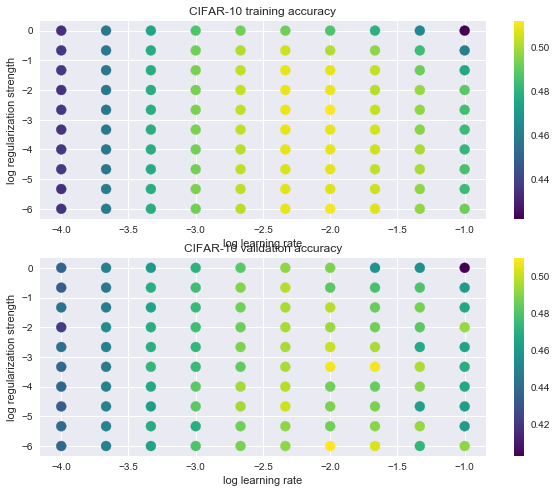

In [4]:
# Use the validation set to tune the learning rate and
# regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5, 1e6, 1e7]

learning_rates = 10 ** np.linspace(-4, -1, 10)
regularization_strengths = 10 ** np.linspace(-6, 0, 10)

results = {}
best_val = -1
best_svm = None

best_lr = None
best_reg = None
###################################################################
# TODO:                                                           #
# Use the validation set to set the learning rate and             #
# regularization strength. This should be identical to the        #
# validation that you did for the SVM; save the best trained      #
# classifer in best_svm. You might also want to play with         #
# different numbers of bins in the color histogram. If you are    #
# careful you should be able to get accuracy of near 0.44 on the  #
# validation set.
####################################################################
import itertools

n_iters = 900
combinations = itertools.product(learning_rates,
                                 regularization_strengths)
it = 0

for lr, reg in combinations:
    it += 1
    svm = LinearSVM()
    svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
              num_iters=n_iters)
    y_train_pred = svm.predict(X_train_feats)
    y_val_pred = svm.predict(X_val_feats)
    train_acc = np.mean(y_train == y_train_pred)
    val_acc = np.mean(y_val == y_val_pred)
    results[(lr, reg)] = (train_acc, val_acc)
#   print('[lr={}, reg={}]'.format(lr, reg))
#   print('    train_acc={}, val_acc={}'.format(train_acc, val_acc))
    if val_acc > best_val:
        best_val = val_acc
        best_lr = lr
        best_reg = reg
        best_svm = svm
    if it % 10 == 0:
        print('[{}] current best: {}'.format(it, best_val))

print('')
print('Best validation:', best_val)
print('    best learning rate:          ', best_lr)
print('    best regularization strength:', best_reg)
print('    best log learning rate:      ', np.log10(best_lr))
print('    best log regularization:     ', np.log10(best_reg))

# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
cm = plt.cm.viridis #[djn] colormap
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size,
            c=colors, cmap=cm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size,
            c=colors, cmap=cm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

##################################################################
#                         END OF YOUR CODE                       #
##################################################################


In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.488


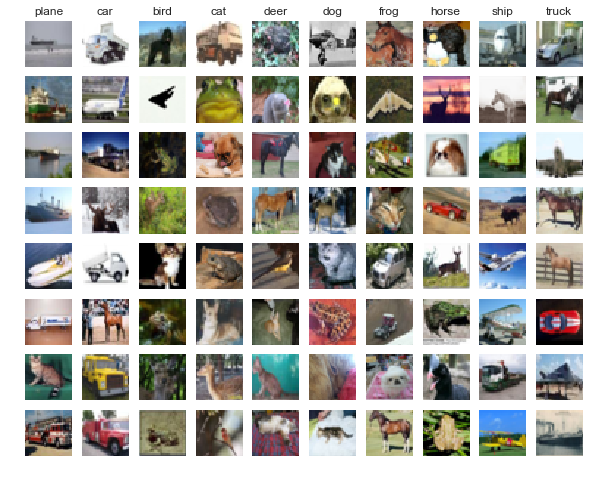

In [6]:
# An important way to gain intuition about how an algorithm works
# is to visualize the mistakes that it makes. In this visualization,
# we show examples of images that are misclassified by our current
# system. The first column shows images that our system labeled as
# "plane" but whose true label is something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes),
                    i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 155)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10
N = X_train_feats.shape[0]

num_iters = 1000
batch_size = 200
std = np.sqrt(2.0 / N)

best_net = None
best_stat = None
best_val_acc = 0.0
best_lr = None
best_decay = None
best_reg = None
reverse = {} # dict: val_accuracy -> (lr, decay, reg)

###################################################################
# TODO: Train a two-layer neural network on image features. You   #
# may want to cross-validate various parameters as in previous    #
# sections. Store your best model in the best_net variable.       #
###################################################################
import itertools

#learning_rates = 10 ** np.linspace(-5, -2, 5)
learning_rates = 10 ** np.linspace(-1, np.log10(3), 5)

#decay_rates = 10 ** np.linspace(-0.017728, -0.004364, 5)
#decay_rates = 10 ** np.linspace(-0.022276, -0.004364, 4)
#decay_rates = [.7, .9, .98]
decay_rates = [.65, .7, .73]

#regularizations = 10 ** np.linspace(-3, -1, 5)
regularizations = 10 ** np.linspace(-3, -1.5, 5)

hyperparams = itertools.product(learning_rates,
                                decay_rates,
                                regularizations)
total = len(learning_rates) * len(decay_rates) * len(regularizations)
it = 0
for lr, decay, reg in hyperparams:
    it += 1
    net = TwoLayerNet(input_dim, hidden_dim, num_classes, std)
    stat = net.train(X_train_feats, y_train, X_val_feats, y_val,
                     num_iters=num_iters, batch_size=batch_size,
                     learning_rate=lr, learning_rate_decay=decay,
                     reg=reg, verbose=False)
    train_acc = np.mean(net.predict(X_train_feats) == y_train)
    val_acc = np.mean(net.predict(X_val_feats) == y_val)
    reverse.setdefault(val_acc, []).append((lr, decay, reg))
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_stat = stat
        best_lr = lr
        best_decay = decay
        best_reg = reg
        best_net = net
    print('[{}/{}, lr={}, decay={}, reg={}]'.format(
        it, total, lr, decay, reg))
    print('\ttrain_acc={}, val_acc={}'.format(train_acc, val_acc))
    print('\tcurrent best:', best_val_acc)
        
it = 0
upto = 3  # diplay top val_acc upto this number
print('')
for val_acc in reversed(sorted(reverse)):
    if it >= upto:
        break
    it += 1
    params = reverse[val_acc]
    print('[{}] val_acc={}'.format(it, val_acc))
    print('\tparams={}'.format(params))

###################################################################
#                          END OF YOUR CODE                       #
###################################################################

[1/75, lr=0.1, decay=0.65, reg=0.001]
	train_acc=0.517020408163, val_acc=0.501
	current best: 0.501
[2/75, lr=0.1, decay=0.65, reg=0.00237137370566]
	train_acc=0.516816326531, val_acc=0.508
	current best: 0.508
[3/75, lr=0.1, decay=0.65, reg=0.0056234132519]
	train_acc=0.513816326531, val_acc=0.507
	current best: 0.508
[4/75, lr=0.1, decay=0.65, reg=0.0133352143216]
	train_acc=0.506632653061, val_acc=0.498
	current best: 0.508
[5/75, lr=0.1, decay=0.65, reg=0.0316227766017]
	train_acc=0.490020408163, val_acc=0.487
	current best: 0.508
[6/75, lr=0.1, decay=0.7, reg=0.001]
	train_acc=0.522428571429, val_acc=0.51
	current best: 0.51
[7/75, lr=0.1, decay=0.7, reg=0.00237137370566]
	train_acc=0.521632653061, val_acc=0.51
	current best: 0.51
[8/75, lr=0.1, decay=0.7, reg=0.0056234132519]
	train_acc=0.520285714286, val_acc=0.51
	current best: 0.51
[9/75, lr=0.1, decay=0.7, reg=0.0133352143216]
	train_acc=0.514285714286, val_acc=0.509
	current best: 0.51
[10/75, lr=0.1, decay=0.7, reg=0.031622

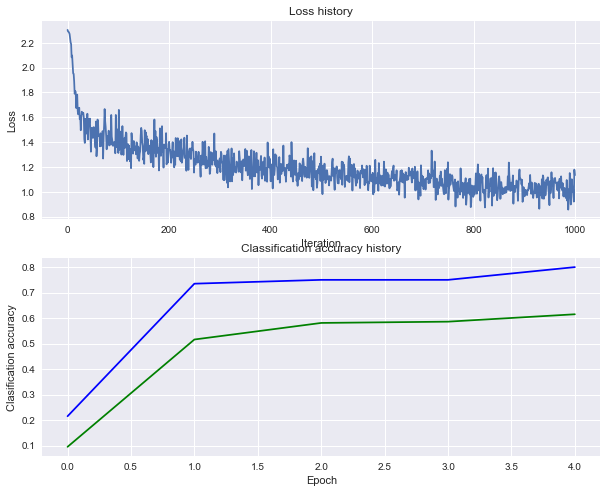

In [9]:
# Plot the loss function and train / validation accuracies
# for the best net
plt.subplot(2, 1, 1)
plt.plot(best_stat['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stat['train_acc_history'], label='train', color='blue')
plt.plot(best_stat['val_acc_history'], label='val', color='green')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [10]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.598


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!